## 2024년 12월 말 데이터로 교체

In [1]:
import pandas as pd
df1 = pd.read_excel('../../bigfile/(2024.12월말기준)_전국공장등록현황.xlsx')

### 전처리

In [2]:
df1.shape # (217048, 38)

# 지역명 전처리
# 강원도 + 강원특별자치도 -> 강원특별자치도
# 제주도 + 제주특별자치도 -> 제주특별자치도

df1['시도명'] = df1['시도명'].replace('강원도', '강원특별자치도')
df1['시도명'] = df1['시도명'].replace('제주도', '제주특별자치도')

df1['시도명'].unique()
# # ['서울특별시', '부산광역시', ' ', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
# #        '세종특별자치시', '경기도', '강원특별자치도', '충청북도', '충청남도', '전라남도', '경상북도',
# #        '경상남도', '제주특별자치도', '전북특별자치도']

# # '시도명'이 빈 문자열인 데이터 제거
df1 = df1[df1['시도명'] != ' ']

# df1.shape # (217036, 38)

### 경기도 전처리

In [4]:
gyeonggi_df1 = df1[df1['시도명']=='경기도']

# # # 시군구명에서 공백 뒤의 내용 삭제
# gyeonggi_df1['시군구명'] = gyeonggi_df1['시군구명'].str.split().str[0] # 32

# # # 여주군 데이터가 2개가 있는데 관리 기관이 경기도 여주시라서 여주시로 합쳐도 무관하다고 판단
# # # '여주군' 데이터를 '여주시' 데이터에 합치기
# gyeonggi_df1['시군구명'] = gyeonggi_df1['시군구명'].replace('여주군', '여주시')
# gyeonggi_df1.shape # (77885, 38)

# # gyeonggi_df1.to_csv('../../bigfile/경기_(2024.12월말기준)_전국공장등록현황.csv', index=False)

# 시군구명에서 공백을 기준으로 첫 번째 단어만 추출
gyeonggi_df1.loc[:, '시군구명'] = gyeonggi_df1['시군구명'].str.split().str[0]

# 특정 값을 다른 값으로 대체
gyeonggi_df1.loc[:, '시군구명'] = gyeonggi_df1['시군구명'].replace('여주군', '여주시')
gyeonggi_df1

,시도명,시군구명,관리기관,회사명,공장구분,단지명,설립구분,입주형태,보유구분,최초승인일,...,지식산업센터명,대표업종,업종명,업종코드,차수,법인주소,필지수,공장주소,공장주소_지번,공장관리번호
58628,경기도,수원시,경기도 수원시,(주)성진이엔씨,개별입지,,일반,일반건축물,임대,,...,,28123,배전반 및 전기 자동제어반 제조업,28123,10,,1,"경기도 수원시 장안구 경수대로1078번길 26, 201호(파장동, 세한상가)",경기도 수원시 장안구 파장동 279-3 세한상가 201호,2022931424
58629,경기도,수원시,경기도 수원시,(주)엔트리연구원,개별입지,,일반,,임대,,...,,28422,일반용 전기 조명장치 제조업 외 1 종,"28422, 28429",10,,1,"경기도 수원시 장안구 파장천로44번길 30 (파장동, 유로빌딩)",경기도 수원시 장안구 파장동 486-1번지 유로빌딩,411112015337377
58630,경기도,수원시,경기도 수원시,e덴쳐치과기공소,개별입지,,창업,임대사업자,임대,,...,,27191,치과용 기기 제조업,27191,10,,1,"경기도 수원시 장안구 장안로314번길 1, 201호(파장동, 홍미빌딩)",경기도 수원시 장안구 파장동 568-11 홍미빌딩 201호,411112023061542
58631,경기도,수원시,경기도 수원시,대우정보기술(주),개별입지,,일반,해당없음,임대,,...,,26410,유선 통신장비 제조업 외 1 종,"26410, 26429",10,,1,"경기도 수원시 장안구 경수대로 1123, 대영빌딩 201호 (파장동)",경기도 수원시 장안구 파장동 555-13번지,411102005099994
58632,경기도,수원시,경기도 수원시,미스터싸인,개별입지,,일반,분양,자가,,...,,33910,간판 및 광고물 제조업,33910,10,,1,경기도 수원시 장안구 파장천로 88-1(파장동),경기도 수원시 장안구 파장동 369-1,2021738971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136513,경기도,양평군,경기도 양평군,우드세라믹스,개별입지,,일반,해당없음,자가,,...,,23221,가정용 및 장식용 도자기 제조업,23221,10,,1,경기도 양평군 개군면 마루터길 46,경기도 양평군 개군면 계전리 488번지,418302004069890
136514,경기도,양평군,경기도 양평군,도기스쿨,개별입지,,일반,,자가,,...,,15190,기타 가죽제품 제조업,15190,10,,1,경기도 양평군 개군면 상자포리 323-1번지,경기도 양평군 개군면 상자포리 323-1번지,418302019434262
217045,경기도,안산시,한국산업단지공단 경기지역본부 시화지사,(주)유스틸,계획입지,시화멀티테크노밸리,국가산업단지,분양,자가,20131230,...,,24199,그 외 기타 1차 철강 제조업,24199,10,,0,"경기도 안산시 단원구 엠티브이8로 6, 시화MTV 6사207 (성곡동)",경기도 안산시 단원구 성곡동 시화MTV 6사207,412732013296422
217046,경기도,안산시,한국산업단지공단 경기지역본부 시화지사,영광솔루션,계획입지,시화멀티테크노밸리,국가산업단지,공장임대,임대,20201229,...,,24212,"알루미늄 제련, 정련 및 합금 제조업",24212,10,,0,"경기도 안산시 단원구 엠티브이7로 13, 6사 205호 (성곡동)",경기도 안산시 단원구 성곡동 6사 205호,412732020558822


### 대표업종별 업종명과 갯수 df

In [99]:
gyeonggi_df1

# KSIC 분류 기준을 딕셔너리로 정의
ksic_classification = {
    '10': '10. 식료품 제조업',
    '11': '11. 음료 제조업',
    '12': '12. 담배 제조업',
    '13': '13. 섬유제품 제조업; 의복 제외',
    '14': '14. 의복, 의복 액세서리 및 모피제품 제조업',
    '15': '15. 가죽, 가방 및 신발 제조업',
    '16': '16. 목재 및 나무제품 제조업; 가구 제외',
    '17': '17. 펄프, 종이 및 종이제품 제조업',
    '18': '18. 인쇄 및 기록매체 복제업',
    '19': '19. 코크스, 연탄 및 석유정제품 제조업',
    '20': '20. 화학물질 및 화학제품 제조업; 의약품 제외',
    '21': '21. 의료용 물질 및 의약품 제조업',
    '22': '22. 고무 및 플라스틱제품 제조업',
    '23': '23. 비금속 광물제품 제조업',
    '24': '24. 1차 금속 제조업',
    '25': '25. 금속가공제품 제조업; 기계 및 가구 제외',
    '26': '26. 전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업',
    '27': '27. 의료, 정밀, 광학 기기 및 시계 제조업',
    '28': '28. 전기장비 제조업',
    '29': '29. 기타 기계 및 장비 제조업',
    '30': '30. 자동차 및 트레일러 제조업',
    '31': '31. 기타 운송장비 제조업',
    '32': '32. 가구 제조업',
    '33': '33. 기타 제품 제조업',
    '34': '34. 산업용 기계 및 장비 수리업'
}

# 대표업종 코드의 앞 두 자리를 추출하여 KSIC 분류에 매칭
gyeonggi_df1['KSIC 분류'] = gyeonggi_df1['대표업종'].astype(str).str[:2].map(ksic_classification)

# gyeonggi_df1.to_csv('../../bigfile/KSIC포함경기데이터.csv', index=False)

ksic_counts_by_region = gyeonggi_df1.groupby(['시군구명', 'KSIC 분류']).size().reset_index(name='갯수')
ksic_counts_by_region.to_csv('../../bigfile/업종별.csv', index=False)

C:\Users\32200812\AppData\Local\Temp\ipykernel_8748\3673006480.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gyeonggi_df1['KSIC 분류'] = gyeonggi_df1['대표업종'].astype(str).str[:2].map(ksic_classification)


In [86]:
# 대표업종별로 업종명 목록 생성
industry_names_by_rep = gyeonggi_df1.groupby('대표업종')['업종명'].apply(lambda x: ', '.join(x.unique())).reset_index()
industry_names_by_rep.columns = ['대표업종', '업종명 목록']

# 대표업종별 갯수 계산
representative_industry_counts = gyeonggi_df1['대표업종'].value_counts().reset_index()
representative_industry_counts.columns = ['대표업종', '갯수']

# 두 데이터프레임 병합
result = pd.merge(representative_industry_counts, industry_names_by_rep, on='대표업종')

# 결과 저장
# result.to_csv('../../bigfile/대표업종별_업종명_목록과_갯수.csv', index=False, encoding='utf-8-sig')
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   대표업종    561 non-null    object
 1   갯수      561 non-null    int64 
 2   업종명 목록  561 non-null    object
dtypes: int64(1), object(2)
memory usage: 13.3+ KB


### 업종별 공장 등록 현황

In [88]:
result

# KSIC 분류 기준을 딕셔너리로 정의
ksic_classification = {
    '10': '10. 식료품 제조업',
    '11': '11. 음료 제조업',
    '12': '12. 담배 제조업',
    '13': '13. 섬유제품 제조업; 의복 제외',
    '14': '14. 의복, 의복 액세서리 및 모피제품 제조업',
    '15': '15. 가죽, 가방 및 신발 제조업',
    '16': '16. 목재 및 나무제품 제조업; 가구 제외',
    '17': '17. 펄프, 종이 및 종이제품 제조업',
    '18': '18. 인쇄 및 기록매체 복제업',
    '19': '19. 코크스, 연탄 및 석유정제품 제조업',
    '20': '20. 화학물질 및 화학제품 제조업; 의약품 제외',
    '21': '21. 의료용 물질 및 의약품 제조업',
    '22': '22. 고무 및 플라스틱제품 제조업',
    '23': '23. 비금속 광물제품 제조업',
    '24': '24. 1차 금속 제조업',
    '25': '25. 금속가공제품 제조업; 기계 및 가구 제외',
    '26': '26. 전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업',
    '27': '27. 의료, 정밀, 광학 기기 및 시계 제조업',
    '28': '28. 전기장비 제조업',
    '29': '29. 기타 기계 및 장비 제조업',
    '30': '30. 자동차 및 트레일러 제조업',
    '31': '31. 기타 운송장비 제조업',
    '32': '32. 가구 제조업',
    '33': '33. 기타 제품 제조업',
    '34': '34. 산업용 기계 및 장비 수리업'
}

# 대표업종 코드의 앞 두 자리를 추출하여 KSIC 분류에 매칭
result['KSIC 분류'] = result['대표업종'].astype(str).str[:2].map(ksic_classification)
result


,대표업종,갯수,업종명 목록,KSIC 분류
0,28123,2045,"배전반 및 전기 자동제어반 제조업, 배전반 및 전기 자동제어반 제조업 외 15 종,...",28. 전기장비 제조업
1,29294,1946,"주형 및 금형 제조업, 주형 및 금형 제조업 외 1 종, 주형 및 금형 제조업 외 ...",29. 기타 기계 및 장비 제조업
2,32029,1659,"기타 목재가구 제조업, 기타 목재가구 제조업 외 2 종, 기타 목재가구 제조업 외 ...",32. 가구 제조업
3,25924,1656,"절삭가공 및 유사처리업 외 5 종, 절삭가공 및 유사처리업, 절삭가공 및 유사처리업...",25. 금속가공제품 제조업; 기계 및 가구 제외
4,26299,1491,"그 외 기타 전자부품 제조업 외 1 종, 그 외 기타 전자부품 제조업, 그 외 기타...","26. 전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업"
...,...,...,...,...
556,15491,1,커피가공업,"15. 가죽, 가방 및 신발 제조업"
557,29351,1,재봉기및자수기제조업,29. 기타 기계 및 장비 제조업
558,36121,1,주방용및음식점용목재가구제조업,NaN
559,46321,1,육류 가공식품 도매업,NaN


In [112]:
industry_gyeonggi_df1 = pd.read_excel('../../bigfile/0106업종별_완성본.xlsx')
industry_gyeonggi_df1['합계'] = industry_gyeonggi_df1.iloc[:, 1:].sum(axis=1)
industry_gyeonggi_df1.to_excel('../../bigfile/업종별공장등록현황14.xlsx', index=False)

### 시군구별 업종별 공장 등록 현황 시각화 그래프

C:\Users\32200812\AppData\Local\Temp\ipykernel_8748\2338208183.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['합계'] = pd.to_numeric(plot_data['합계'], errors='coerce')


<Figure size 900x500 with 0 Axes>

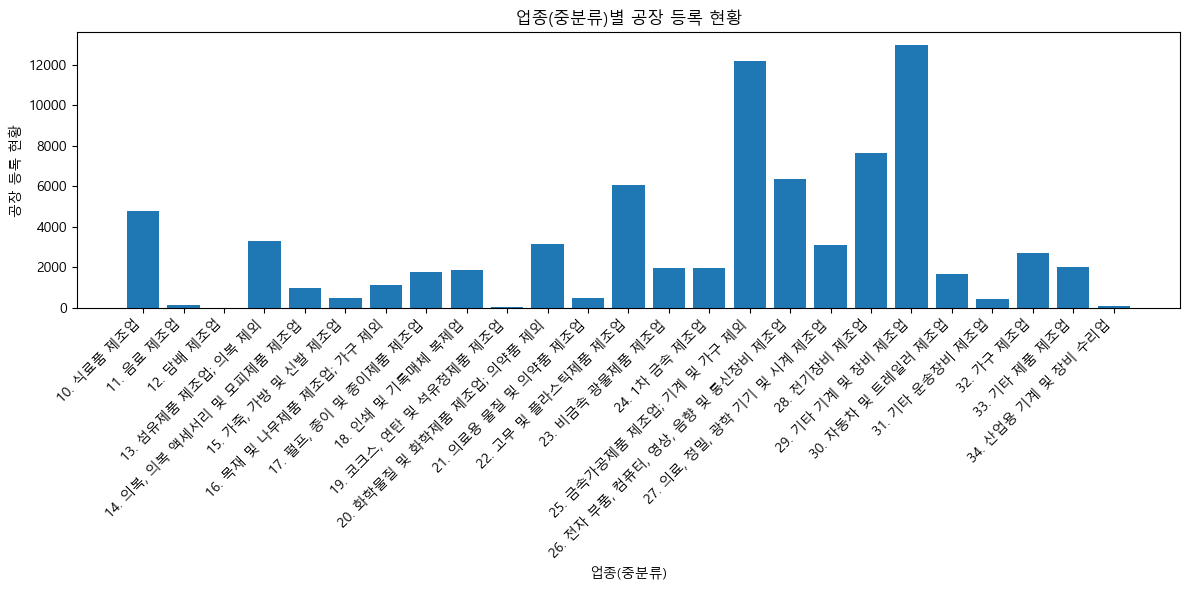

In [111]:
# Extract '업종(중분류)' and '합계' columns for plotting
plot_data = industry_gyeonggi_df1[['업종(중분류)', '합계']]

# Convert '합계' to numeric if needed
plot_data['합계'] = pd.to_numeric(plot_data['합계'], errors='coerce')

## 시각화
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(9, 5))

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(plot_data['업종(중분류)'], plot_data['합계'])
plt.title('업종(중분류)별 공장 등록 현황')
plt.xlabel('업종(중분류)')
plt.ylabel('공장 등록 현황')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [123]:
gyeonggi_df1[gyeonggi_df1['시군구명']=='가평군'].to_csv('../../bigfile/가평.csv', index=False)

### 시군구별 면적현황

In [129]:
required_columns = ['시군구명', '용지면적', '제조시설면적', '부대시설면적']
df_filtered = gyeonggi_df1[required_columns]

df_filtered.info()

# 시군구별 합계 계산
df_grouped = df_filtered.groupby(['시군구명']).sum().reset_index()
df_grouped

# 전체 합계를 기준으로 비율 계산
total_land = df_grouped['용지면적'].sum()
total_manufacture = df_grouped['제조시설면적'].sum()
total_facility = df_grouped['부대시설면적'].sum()

df_grouped['용지면적_비율'] = (df_grouped['용지면적'] / total_land * 100).round(4)
df_grouped['제조시설면적_비율'] = (df_grouped['제조시설면적'] / total_manufacture * 100).round(4)
df_grouped['부대시설면적_비율'] = (df_grouped['부대시설면적'] / total_facility * 100).round(4)

df_grouped[['용지면적', '제조시설면적', '부대시설면적']] = df_grouped[['용지면적', '제조시설면적', '부대시설면적']].astype(int)
# df_grouped.to_csv('../../bigfile/시군구별면적.csv', index=False)
df_grouped

<class 'pandas.core.frame.DataFrame'>
Index: 77885 entries, 58628 to 217047
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구명    77885 non-null  object 
 1   용지면적    77885 non-null  float64
 2   제조시설면적  77885 non-null  float64
 3   부대시설면적  77885 non-null  float64
dtypes: float64(3), object(1)
memory usage: 3.0+ MB


,시군구명,용지면적,제조시설면적,부대시설면적,용지면적_비율,제조시설면적_비율,부대시설면적_비율
0,가평군,579618,87714,69955,0.2952,0.1169,0.1763
1,고양시,924270,401354,239629,0.4707,0.5348,0.6039
2,과천시,196044,9003,4891,0.0998,0.0120,0.0123
3,광명시,635484,348515,79260,0.3236,0.4644,0.1997
4,광주시,5454806,1262285,845259,2.7778,1.6819,2.1300
5,구리시,92320,26494,9767,0.0470,0.0353,0.0246
6,군포시,1291472,793992,737905,0.6577,1.0580,1.8595
7,김포시,19107164,7234393,1801806,9.7300,9.6395,4.5404
8,남양주시,3671572,1160230,689725,1.8697,1.5460,1.7381
9,동두천시,789638,326081,116026,0.4021,0.4345,0.2924


### 업종별 공장등록 면적 현황

In [135]:
gyeonggi_df1

required_columns = ['KSIC 분류', '용지면적', '제조시설면적', '부대시설면적']
df_filtered = gyeonggi_df1[required_columns]

# 시군구별 합계 계산
df_grouped = df_filtered.groupby(['KSIC 분류']).sum().reset_index()
df_grouped

# 전체 합계를 기준으로 비율 계산
total_land = df_grouped['용지면적'].sum()
total_manufacture = df_grouped['제조시설면적'].sum()
total_facility = df_grouped['부대시설면적'].sum()

df_grouped['용지면적_비율'] = (df_grouped['용지면적'] / total_land * 100).round(4)
df_grouped['제조시설면적_비율'] = (df_grouped['제조시설면적'] / total_manufacture * 100).round(4)
df_grouped['부대시설면적_비율'] = (df_grouped['부대시설면적'] / total_facility * 100).round(4)

df_grouped[['용지면적', '제조시설면적', '부대시설면적']] = df_grouped[['용지면적', '제조시설면적', '부대시설면적']].astype(int)
df_grouped

df_grouped.to_csv('../../bigfile/업종별면적.csv', index=False)